Step 1: Setup and Load CIFAR-10 Dataset

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Pick a few sample images
sample_images = x_train[:5] 


Step 2: Convert to Grayscale and Normalize

In [ ]:
gray_images = [cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in sample_images]
gray_images = [img / 255.0 for img in gray_images]  

Step 3: Apply SVD and Reconstruct with k Components

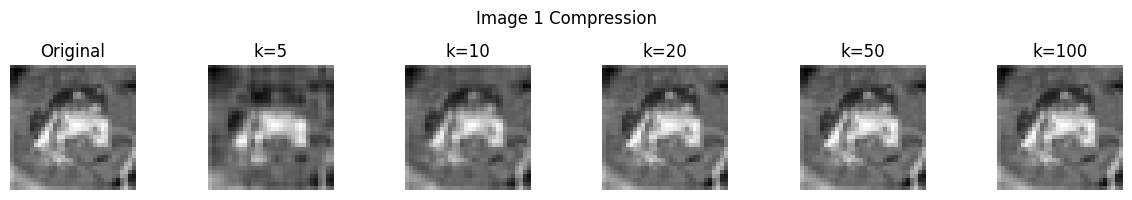

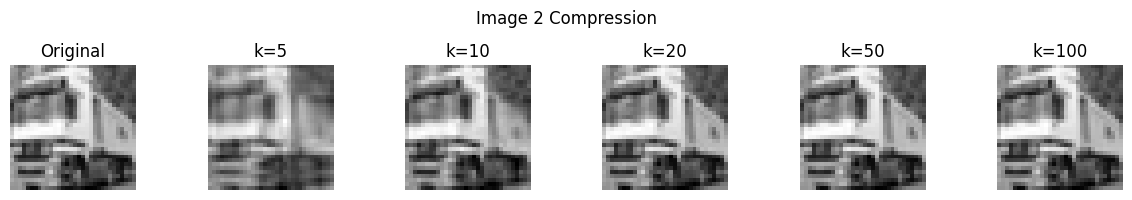

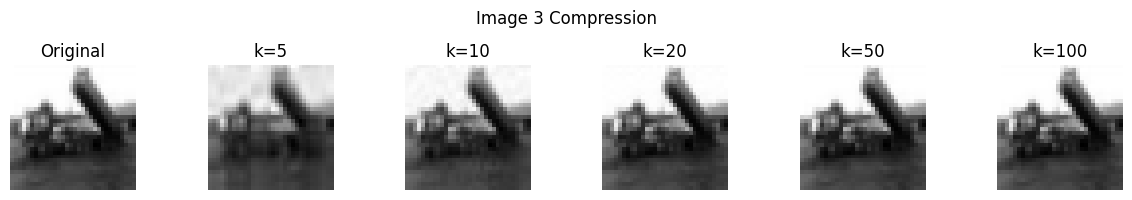

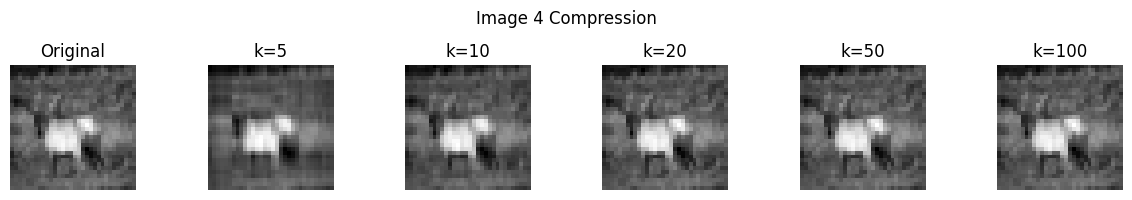

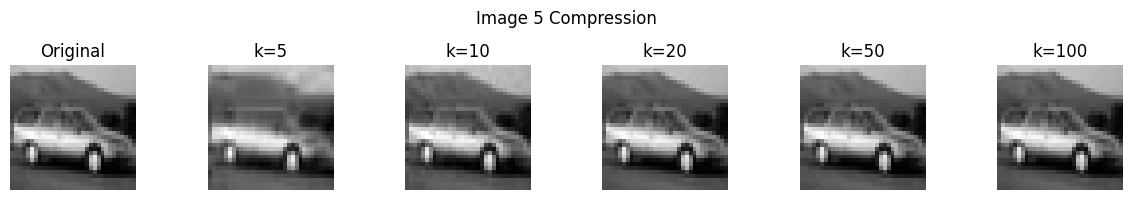

In [7]:
def compress_image(img, k):
    U, S, Vt = np.linalg.svd(img, full_matrices=False)
    S = np.diag(S[:k])
    compressed_img = np.dot(U[:, :k], np.dot(S, Vt[:k, :]))
    return compressed_img

k_values = [5, 10, 20, 50, 100]

# Plot reconstructions
for i, img in enumerate(gray_images):
    plt.figure(figsize=(12, 2))
    plt.subplot(1, len(k_values) + 1, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    for j, k in enumerate(k_values):
        compressed = compress_image(img, k)
        plt.subplot(1, len(k_values) + 1, j+2)
        plt.imshow(compressed, cmap='gray')
        plt.title(f'k={k}')
        plt.axis('off')
    plt.suptitle(f"Image {i+1} Compression")
    plt.tight_layout()
    plt.show()


Step 4: Evaluation – MSE and PSNR

In [10]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse

for i, img in enumerate(gray_images):
    print(f"\nImage {i+1}")
    for k in k_values:
        compressed = compress_image(img, k)
        error = mse(img, compressed)
        quality = psnr(img, compressed)
        print(f"k={k}: MSE={error:.4f}, PSNR={quality:.2f}")



Image 1
k=5: MSE=0.0033, PSNR=24.82
k=10: MSE=0.0007, PSNR=31.80
k=20: MSE=0.0000, PSNR=45.40
k=50: MSE=0.0000, PSNR=306.83
k=100: MSE=0.0000, PSNR=306.83

Image 2
k=5: MSE=0.0059, PSNR=22.26
k=10: MSE=0.0013, PSNR=28.82
k=20: MSE=0.0001, PSNR=42.87
k=50: MSE=0.0000, PSNR=304.91
k=100: MSE=0.0000, PSNR=304.91

Image 3
k=5: MSE=0.0019, PSNR=27.22
k=10: MSE=0.0002, PSNR=36.45
k=20: MSE=0.0000, PSNR=50.72
k=50: MSE=0.0000, PSNR=302.27
k=100: MSE=0.0000, PSNR=302.27

Image 4
k=5: MSE=0.0012, PSNR=29.38
k=10: MSE=0.0004, PSNR=34.30
k=20: MSE=0.0000, PSNR=44.87
k=50: MSE=0.0000, PSNR=305.56
k=100: MSE=0.0000, PSNR=305.56

Image 5
k=5: MSE=0.0018, PSNR=27.45
k=10: MSE=0.0004, PSNR=34.30
k=20: MSE=0.0000, PSNR=49.05
k=50: MSE=0.0000, PSNR=298.69
k=100: MSE=0.0000, PSNR=298.69


Step 5: Plot k vs MSE

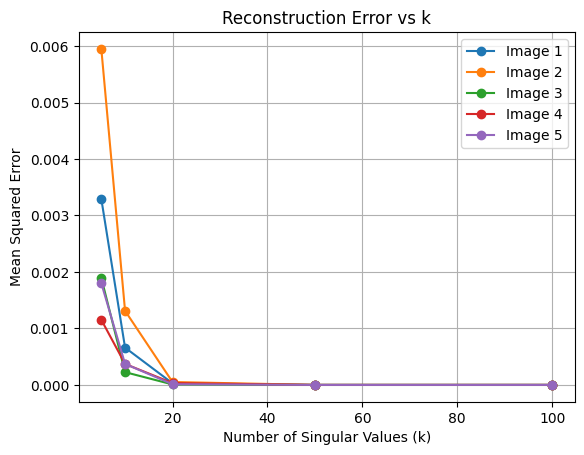

In [11]:
for i, img in enumerate(gray_images):
    mse_list = []
    for k in k_values:
        compressed = compress_image(img, k)
        error = mse(img, compressed)
        mse_list.append(error)

    plt.plot(k_values, mse_list, marker='o', label=f'Image {i+1}')
plt.xlabel("Number of Singular Values (k)")
plt.ylabel("Mean Squared Error")
plt.title("Reconstruction Error vs k")
plt.legend()
plt.grid(True)
plt.show()
